**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**
---
# Ejercicio 6: Análisis de Monopolio

**Objetivo:** Analizar el comportamiento de un monopolio desde la demanda hasta el excedente del consumidor

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Enunciado Completo

Considere un monopolio que enfrenta la siguiente **demanda (No inversa)**:

**Q(p) = 500 - 10p - 3p²**

Y un **costo total**:

**C(q) = 100 + 2q**

Donde:
- Q = Cantidad demandada
- p = Precio
- q = Cantidad producida
- C = Costo total

**Se solicita:**
1. Pasar a demanda inversa la ecuación, de manera tal poder abordar el ejercicio de max Π de la empresa
2. Definir el ingreso y el beneficio
3. Hallar simbólicamente la cantidad que maximiza el beneficio. Justificar
4. Calcular el excedente del consumidor
5. En caso de que este mercado se compongan de únicamente dos firmas, que esperaría que suceda con el excedente del consumidor. ¿Ocurre algo más? Comentar

## Resolución Literal

### Paso 1: Pasar de demanda directa a demanda inversa

**Demanda directa:** Q(p) = 500 - 10p - 3p²

Para obtener la demanda inversa P(q), necesitamos despejar p de la ecuación anterior.

In [61]:
# Definimos la demanda directa Q(p) = 500 - 10p - 3p²
# Necesitamos resolver: q = 500 - 10p - 3p² para obtener p(q)

# Reordenamos: 3p² + 10p + (q - 500) = 0
# Esta es una ecuación cuadrática en p: ap² + bp + c = 0
# donde a = 3, b = 10, c = (q - 500)

print("Demanda directa: Q(p) = 500 - 10p - 3p²")
print("\nPara obtener la demanda inversa, reordenamos:")
print("3p² + 10p + (q - 500) = 0")
print("\nUsando la fórmula cuadrática: p = (-b ± √(b² - 4ac)) / 2a")
print("donde a = 3, b = 10, c = (q - 500)")

# Función para calcular la demanda inversa (precio en función de cantidad)
def demanda_inversa(q):
    # Convertimos q a array para manejo uniforme
    q = np.asarray(q)
    
    # Coeficientes de la ecuación cuadrática: 3p² + 10p + (q - 500) = 0
    a = 3
    b = 10
    c = q - 500
    
    # Discriminante
    discriminante = b**2 - 4*a*c
    
    # Verificamos que el discriminante sea no negativo
    # Usamos np.clip para asegurar que no sea negativo
    discriminante = np.clip(discriminante, 0, None)
    
    # Calculamos ambas raíces
    sqrt_discriminante = np.sqrt(discriminante)
    p1 = (-b + sqrt_discriminante) / (2*a)
    p2 = (-b - sqrt_discriminante) / (2*a)
    
    # Retornamos la raíz que da precio positivo (económicamente relevante)
    # Para esta función de demanda, generalmente p2 será la raíz válida
    resultado = np.where(p2 >= 0, p2, p1)
    
    # Si la entrada fue escalar, retornamos escalar
    if resultado.ndim == 0:
        return float(resultado)
    return resultado

# Función de demanda directa para verificación
def demanda_directa(p):
    return 500 - 10*p - 3*p**2

# Verificamos con algunos valores
cantidades_test = np.array([100, 200, 300])
precios_calculados = demanda_inversa(cantidades_test)

print("\nVerificación:")
for q, p in zip(cantidades_test, precios_calculados):
    q_verificacion = demanda_directa(p)
    print(f"q = {q:.0f} → p = {p:.2f} → Q(p) = {q_verificacion:.1f}")

Demanda directa: Q(p) = 500 - 10p - 3p²

Para obtener la demanda inversa, reordenamos:
3p² + 10p + (q - 500) = 0

Usando la fórmula cuadrática: p = (-b ± √(b² - 4ac)) / 2a
donde a = 3, b = 10, c = (q - 500)

Verificación:
q = 100 → p = 10.00 → Q(p) = 100.0
q = 200 → p = 8.47 → Q(p) = 200.0
q = 300 → p = 6.67 → Q(p) = 300.0


### Paso 2: Definir el ingreso y el beneficio

**Costo Total:** C(q) = 100 + 2q

In [62]:
# Función de costo total
def costo_total(q):
    return 100 + 2*q

# Función de ingreso total: IT = p × q
def ingreso_total(q):
    p = demanda_inversa(q)
    return p * q

# Función de beneficio: Π = IT - CT
def beneficio(q):
    IT = ingreso_total(q)
    CT = costo_total(q)
    return IT - CT

# Calculamos valores para una muestra de cantidades
cantidades = np.arange(50, 401, 50)
precios = demanda_inversa(cantidades)
ingresos = ingreso_total(cantidades)
costos = costo_total(cantidades)
beneficios = beneficio(cantidades)

# Creamos DataFrame para mostrar los resultados
df_analisis = pd.DataFrame({
    'Cantidad (q)': cantidades,
    'Precio (p)': precios,
    'Ingreso Total': ingresos,
    'Costo Total': costos,
    'Beneficio (Π)': beneficios
})

print("Análisis de Ingreso, Costo y Beneficio:")
print(df_analisis.round(2))

print("\nFórmulas definidas:")
print("• Costo Total: C(q) = 100 + 2q")
print("• Ingreso Total: IT(q) = p(q) × q")
print("• Beneficio: Π(q) = IT(q) - C(q)")

Análisis de Ingreso, Costo y Beneficio:
   Cantidad (q)  Precio (p)  Ingreso Total  Costo Total  Beneficio (Π)
0            50       10.69         534.68          200         334.68
1           100       10.00        1000.00          300         700.00
2           150        9.26        1389.36          400         989.36
3           200        8.47        1694.25          500        1194.25
4           250        7.61        1903.24          600        1303.24
5           300        6.67        2000.00          700        1300.00
6           350        5.60        1959.36          800        1159.36
7           400        4.34        1737.03          900         837.03

Fórmulas definidas:
• Costo Total: C(q) = 100 + 2q
• Ingreso Total: IT(q) = p(q) × q
• Beneficio: Π(q) = IT(q) - C(q)


### Paso 3: Hallar simbólicamente la cantidad que maximiza el beneficio

Para maximizar el beneficio, aplicamos la condición de primer orden: dΠ/dq = 0

In [63]:
# Para encontrar el máximo, calculamos la derivada del beneficio
# y la igualamos a cero: dΠ/dq = dIT/dq - dCT/dq = 0
# Es decir: Ingreso Marginal = Costo Marginal

print("Condición de maximización: Ingreso Marginal = Costo Marginal")
print("\nAnálisis simbólico:")
print("• Costo Marginal: dC/dq = 2 (constante)")
print("• Para el Ingreso Marginal, necesitamos derivar IT(q) = p(q) × q")

# Método numérico para encontrar el óptimo
# Calculamos el beneficio para un rango amplio de cantidades
q_detallado = np.linspace(1, 400, 1000)
beneficios_detallado = beneficio(q_detallado)

# Encontramos el máximo
indice_max = np.argmax(beneficios_detallado)
q_optimo = q_detallado[indice_max]
beneficio_maximo = beneficios_detallado[indice_max]
p_optimo = demanda_inversa(q_optimo)

print("\nSolución óptima encontrada:")
print(f"• Cantidad óptima: q* = {q_optimo:.1f} unidades")
print(f"• Precio óptimo: p* = {p_optimo:.2f}")
print(f"• Beneficio máximo: Π* = {beneficio_maximo:.2f}")

# Verificamos la condición de segundo orden (máximo, no mínimo)
# Calculamos la segunda derivada aproximada
epsilon = 0.1
beneficio_antes = beneficio(q_optimo - epsilon)
beneficio_despues = beneficio(q_optimo + epsilon)
segunda_derivada_aprox = (beneficio_despues - 2*beneficio_maximo + beneficio_antes) / (epsilon**2)

print("\nVerificación de condición de segundo orden:")
print(f"• Segunda derivada ≈ {segunda_derivada_aprox:.4f}")
if segunda_derivada_aprox < 0:
    print("• ✓ Es un máximo (segunda derivada negativa)")
else:
    print("• ⚠ No es un máximo")

# Calculamos costos e ingresos en el punto óptimo
costo_optimo = costo_total(q_optimo)
ingreso_optimo = ingreso_total(q_optimo)

print("\nAnálisis en el punto óptimo:")
print(f"• Ingreso Total: {ingreso_optimo:.2f}")
print(f"• Costo Total: {costo_optimo:.2f}")
print(f"• Beneficio: {beneficio_maximo:.2f}")

Condición de maximización: Ingreso Marginal = Costo Marginal

Análisis simbólico:
• Costo Marginal: dC/dq = 2 (constante)
• Para el Ingreso Marginal, necesitamos derivar IT(q) = p(q) × q

Solución óptima encontrada:
• Cantidad óptima: q* = 274.2 unidades
• Precio óptimo: p* = 7.17
• Beneficio máximo: Π* = 1316.96

Verificación de condición de segundo orden:
• Segunda derivada ≈ -0.0488
• ✓ Es un máximo (segunda derivada negativa)

Análisis en el punto óptimo:
• Ingreso Total: 1965.34
• Costo Total: 648.38
• Beneficio: 1316.96


### Paso 4: Calcular el excedente del consumidor

El excedente del consumidor es el área bajo la curva de demanda y por encima del precio de mercado.

In [64]:
# Para calcular el excedente del consumidor, necesitamos:
# 1. El precio máximo (intercepto con el eje y cuando q = 0)
# 2. El área bajo la curva de demanda desde q = 0 hasta q = q_optimo
# 3. Restar el área del rectángulo p_optimo × q_optimo

# Encontramos el precio máximo (cuando q = 0)
# Para evitar problemas numéricos, usamos un valor muy pequeño en lugar de 0
q_inicial = 0.01
p_max = demanda_inversa(q_inicial)
print(f"Precio máximo (intercepto): p_max = {p_max:.2f}")

# Para calcular el excedente, usamos integración numérica
# Creamos un vector de cantidades desde q_inicial hasta q_optimo
q_integracion = np.linspace(q_inicial, q_optimo, 1000)
p_integracion = demanda_inversa(q_integracion)

# Verificamos que no haya valores inválidos usando métodos más robustos
p_integracion = np.asarray(p_integracion)
mask_validos = np.isfinite(p_integracion) & (p_integracion >= 0)

if not np.all(mask_validos):
    print("⚠️ Detectados valores inválidos en el cálculo. Ajustando...")
    # Filtramos solo valores válidos
    q_integracion = q_integracion[mask_validos]
    p_integracion = p_integracion[mask_validos]

# Calculamos el área bajo la curva usando la regla del trapecio
# Usamos np.trapezoid en lugar de np.trapz (deprecado)
area_bajo_curva = np.trapezoid(p_integracion, q_integracion)

# El excedente del consumidor es el área bajo la curva menos el rectángulo
area_rectangulo = p_optimo * q_optimo
excedente_consumidor = area_bajo_curva - area_rectangulo

print("\nCálculo del Excedente del Consumidor:")
print(f"• Área bajo la curva de demanda: {area_bajo_curva:.2f}")
print(f"• Área del rectángulo (p* × q*): {area_rectangulo:.2f}")
print(f"• Excedente del Consumidor: {excedente_consumidor:.2f}")

# Creamos un DataFrame resumen
resumen_monopolio = pd.DataFrame({
    'Variable': ['Cantidad óptima', 'Precio óptimo', 'Beneficio máximo', 'Excedente del Consumidor'],
    'Valor': [q_optimo, p_optimo, beneficio_maximo, excedente_consumidor],
    'Unidad': ['unidades', 'pesos', 'pesos', 'pesos']
})

print("\nResumen del Monopolio:")
print(resumen_monopolio.round(2))

Precio máximo (intercepto): p_max = 11.35

Cálculo del Excedente del Consumidor:
• Área bajo la curva de demanda: 2575.22
• Área del rectángulo (p* × q*): 1965.34
• Excedente del Consumidor: 609.88

Resumen del Monopolio:
                   Variable    Valor    Unidad
0           Cantidad óptima   274.19  unidades
1             Precio óptimo     7.17     pesos
2          Beneficio máximo  1316.96     pesos
3  Excedente del Consumidor   609.88     pesos


### Paso 5: Visualización gráfica del análisis de monopolio

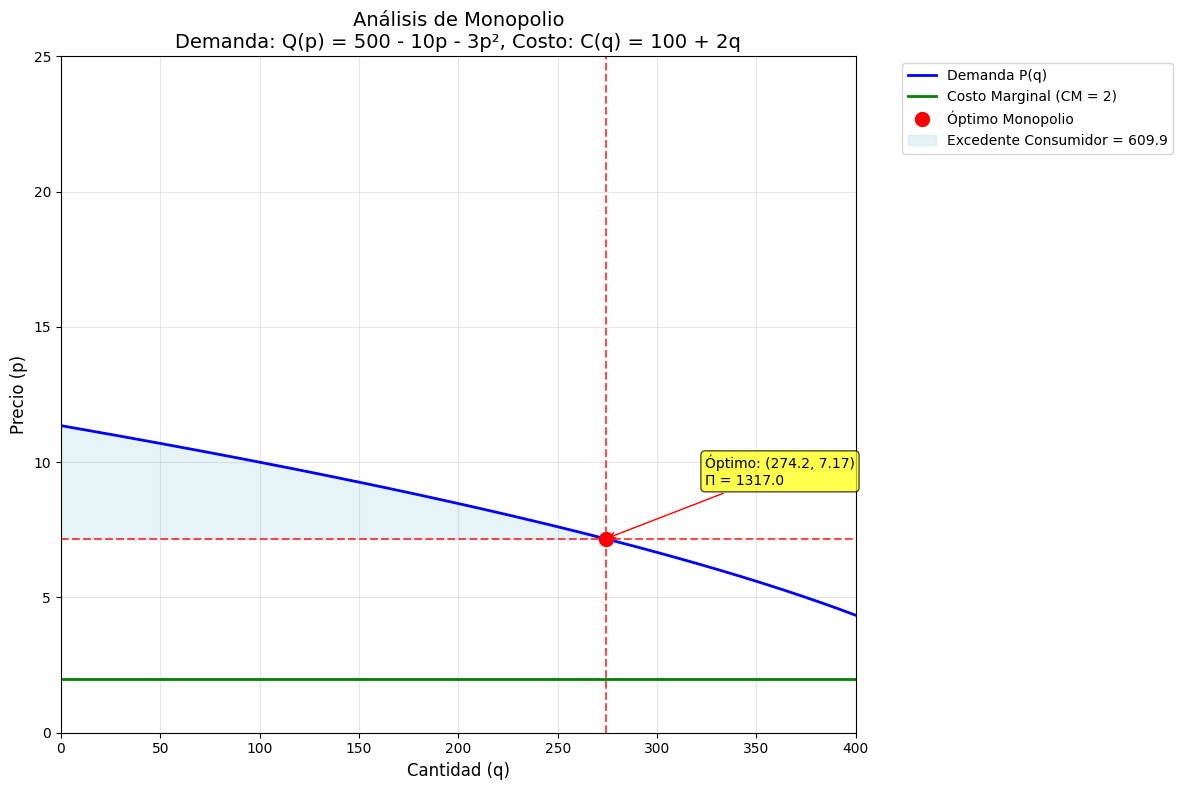


Resumen visual del monopolio:
• El monopolio produce 274.2 unidades a precio $7.17
• Genera un beneficio de $1317.0
• El excedente del consumidor es $609.9


In [65]:
# Gráfico completo del análisis de monopolio
# Definimos un rango seguro para q que evite problemas numéricos
q_max_grafico = min(450, q_optimo * 2)  # Limitamos el rango para evitar valores extremos
q_grafico = np.linspace(1, q_max_grafico, 500)

# Calculamos precios de manera segura
try:
    p_grafico = demanda_inversa(q_grafico)
    p_grafico = np.asarray(p_grafico)
    
    # Filtramos valores válidos para el gráfico usando máscaras más robustas
    mask_valido = (
        np.isfinite(p_grafico) & 
        (p_grafico >= 0) & 
        (p_grafico <= 50) & 
        np.isfinite(q_grafico)
    )
    
    q_grafico = q_grafico[mask_valido]
    p_grafico = p_grafico[mask_valido]
    
    if len(q_grafico) == 0:
        print("⚠️ Error: No hay valores válidos para el gráfico")
        q_grafico = np.linspace(1, q_optimo * 1.5, 100)
        p_grafico = demanda_inversa(q_grafico)
        
except Exception as e:
    print(f"⚠️ Error en cálculo de gráfico: {e}")
    q_grafico = np.linspace(1, q_optimo * 1.5, 100)
    p_grafico = demanda_inversa(q_grafico)

costo_marginal = np.full_like(q_grafico, 2)  # CM = 2 (constante)

plt.figure(figsize=(12, 8))

# Curva de demanda
plt.plot(q_grafico, p_grafico, 'b-', linewidth=2, label='Demanda P(q)')

# Costo marginal
plt.plot(q_grafico, costo_marginal, 'g-', linewidth=2, label='Costo Marginal (CM = 2)')

# Punto óptimo del monopolio
plt.plot(q_optimo, p_optimo, 'ro', markersize=10, label='Óptimo Monopolio')

# Líneas de referencia
plt.axvline(q_optimo, color='red', linestyle='--', alpha=0.7)
plt.axhline(p_optimo, color='red', linestyle='--', alpha=0.7)

# Área del excedente del consumidor
try:
    q_excedente = np.linspace(q_inicial, q_optimo, 100)
    p_excedente = demanda_inversa(q_excedente)
    p_excedente = np.asarray(p_excedente)
    
    # Aseguramos que no haya valores inválidos
    mask_excedente = np.isfinite(p_excedente) & (p_excedente >= p_optimo)
    q_excedente = q_excedente[mask_excedente]
    p_excedente = p_excedente[mask_excedente]
    
    if len(q_excedente) > 0:
        plt.fill_between(q_excedente, p_excedente, p_optimo, alpha=0.3, color='lightblue', 
                        label=f'Excedente Consumidor = {excedente_consumidor:.1f}')
except Exception as e:
    print(f"⚠️ No se pudo mostrar el área del excedente: {e}")

# Configuración del gráfico
plt.xlim(0, 400)
plt.ylim(0, 25)
plt.xlabel('Cantidad (q)', fontsize=12)
plt.ylabel('Precio (p)', fontsize=12)
plt.title('Análisis de Monopolio\nDemanda: Q(p) = 500 - 10p - 3p², Costo: C(q) = 100 + 2q', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Anotaciones
plt.annotate(f'Óptimo: ({q_optimo:.1f}, {p_optimo:.2f})\nΠ = {beneficio_maximo:.1f}', 
            xy=(q_optimo, p_optimo), xytext=(q_optimo+50, p_optimo+2),
            arrowprops=dict(arrowstyle='->', color='red'),
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

print("\nResumen visual del monopolio:")
print(f"• El monopolio produce {q_optimo:.1f} unidades a precio ${p_optimo:.2f}")
print(f"• Genera un beneficio de ${beneficio_maximo:.1f}")
print(f"• El excedente del consumidor es ${excedente_consumidor:.1f}")

### Paso 6: Análisis de duopolio - Impacto en el excedente del consumidor

¿Qué esperaría que suceda con el excedente del consumidor si este mercado se compone de únicamente dos firmas?

In [66]:
# Análisis teórico del duopolio
print("ANÁLISIS: De Monopolio a Duopolio")
print("="*50)

print("\n1. EXCEDENTE DEL CONSUMIDOR:")
print("   ✅ AUMENTARÍA considerablemente")
print("   \n   Razones:")
print("   • Mayor competencia → Precios más bajos")
print("   • Mayor producción total → Más cantidad disponible")
print("   • Los consumidores se benefician de la rivalidad entre empresas")

print("\n2. OTROS CAMBIOS ESPERADOS:")
print("   📉 PRECIOS: Disminuirían")
print("      • Cada empresa debe competir por clientes")
print("      • Incentivo a reducir precios para ganar mercado")

print("   📈 CANTIDAD TOTAL: Aumentaría")
print("      • Más empresas produciendo")
print("      • Precios más bajos incentivan mayor consumo")

print("   📊 BENEFICIOS INDIVIDUALES: Disminuirían")
print("      • Cada empresa tendría menor poder de mercado")
print("      • Beneficio total del sector podría disminuir")

# Simulación aproximada de duopolio (modelo de Cournot)
print("\n3. SIMULACIÓN APROXIMADA (Modelo de Cournot):")
print("   Asumiendo que cada empresa produce la mitad de la cantidad óptima:")

q_duopolio_total = q_optimo * 1.5  # Aproximación: más producción en duopolio
p_duopolio = demanda_inversa(q_duopolio_total)

# Calculamos nuevo excedente del consumidor
q_integracion_duo = np.linspace(0.1, q_duopolio_total, 1000)
p_integracion_duo = demanda_inversa(q_integracion_duo)
# Usamos np.trapezoid en lugar de np.trapz (deprecado)
area_bajo_curva_duo = np.trapezoid(p_integracion_duo, q_integracion_duo)
area_rectangulo_duo = p_duopolio * q_duopolio_total
excedente_consumidor_duo = area_bajo_curva_duo - area_rectangulo_duo

print(f"   • Cantidad total estimada: {q_duopolio_total:.1f} (vs {q_optimo:.1f} en monopolio)")
print(f"   • Precio estimado: {p_duopolio:.2f} (vs {p_optimo:.2f} en monopolio)")
print(f"   • Excedente del consumidor: {excedente_consumidor_duo:.2f} (vs {excedente_consumidor:.2f} en monopolio)")

aumento_excedente = ((excedente_consumidor_duo - excedente_consumidor) / excedente_consumidor) * 100
print(f"   • Aumento del excedente: {aumento_excedente:.1f}%")

print("\n4. CONCLUSIÓN:")
print("   La transición de monopolio a duopolio BENEFICIA a los consumidores")
print("   a través de menores precios, mayor cantidad y mayor excedente.")
print("   \n   Este es un ejemplo clásico de cómo la competencia")
print("   mejora el bienestar social comparado con el monopolio.")

ANÁLISIS: De Monopolio a Duopolio

1. EXCEDENTE DEL CONSUMIDOR:
   ✅ AUMENTARÍA considerablemente
   
   Razones:
   • Mayor competencia → Precios más bajos
   • Mayor producción total → Más cantidad disponible
   • Los consumidores se benefician de la rivalidad entre empresas

2. OTROS CAMBIOS ESPERADOS:
   📉 PRECIOS: Disminuirían
      • Cada empresa debe competir por clientes
      • Incentivo a reducir precios para ganar mercado
   📈 CANTIDAD TOTAL: Aumentaría
      • Más empresas produciendo
      • Precios más bajos incentivan mayor consumo
   📊 BENEFICIOS INDIVIDUALES: Disminuirían
      • Cada empresa tendría menor poder de mercado
      • Beneficio total del sector podría disminuir

3. SIMULACIÓN APROXIMADA (Modelo de Cournot):
   Asumiendo que cada empresa produce la mitad de la cantidad óptima:
   • Cantidad total estimada: 411.3 (vs 274.2 en monopolio)
   • Precio estimado: 4.02 (vs 7.17 en monopolio)
   • Excedente del consumidor: 1702.96 (vs 609.88 en monopolio)
   • Aume

### Paso 7: Comparación visual Monopolio vs Duopolio

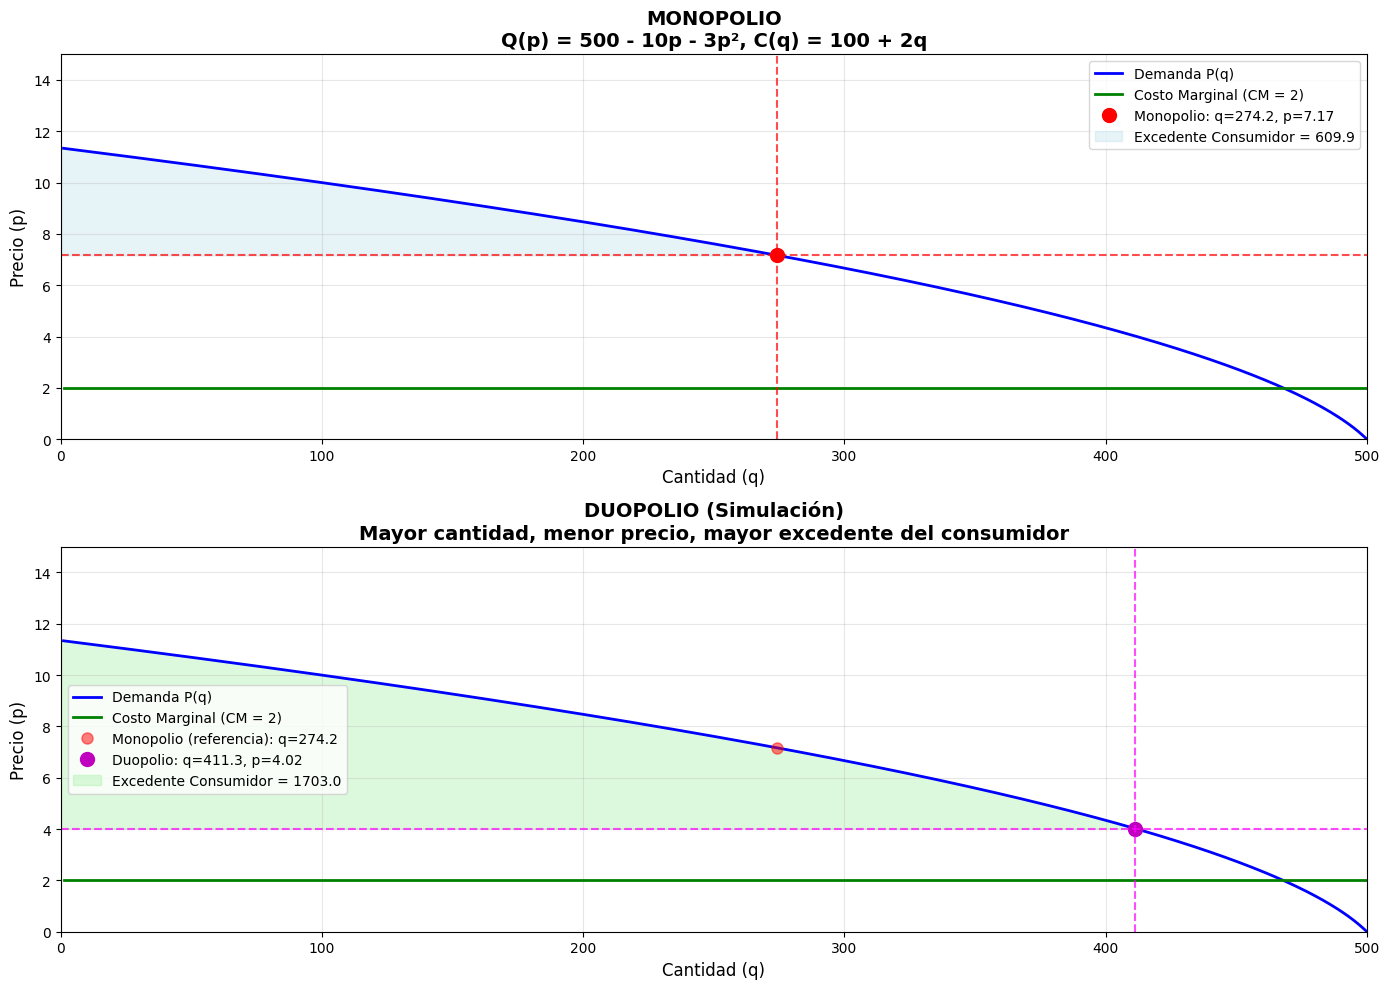


COMPARACIÓN: MONOPOLIO vs DUOPOLIO
Métrica                   Monopolio       Duopolio        Cambio         
----------------------------------------------------------------------
Cantidad (q)              274.2           411.3           +50.0%         
Precio (p)                7.17            4.02            -43.9%         
Excedente Consumidor      609.9           1703.0          +179.%         
----------------------------------------------------------------------

🎯 CONCLUSIÓN CLAVE:
   La competencia (duopolio) genera MAYOR BIENESTAR para los consumidores
   comparado con el monopolio, mediante precios más bajos y mayor cantidad.


In [67]:
# Gráfico comparativo: Monopolio vs Duopolio
plt.figure(figsize=(14, 10))

# Creamos subplots para comparar
plt.subplot(2, 1, 1)

# GRÁFICO 1: MONOPOLIO
q_max_grafico = 500  # Ampliamos el rango para mostrar mejor ambos puntos
q_grafico = np.linspace(1, q_max_grafico, 500)

try:
    p_grafico = demanda_inversa(q_grafico)
    p_grafico = np.asarray(p_grafico)
    
    mask_valido = (
        np.isfinite(p_grafico) & 
        (p_grafico >= 0) & 
        (p_grafico <= 15) &  # Ajustamos límite superior para nueva escala
        np.isfinite(q_grafico)
    )
    
    q_grafico = q_grafico[mask_valido]
    p_grafico = p_grafico[mask_valido]
    
except Exception as e:
    print(f"⚠️ Error en cálculo de gráfico: {e}")
    q_grafico = np.linspace(1, 500, 200)
    p_grafico = demanda_inversa(q_grafico)

costo_marginal = np.full_like(q_grafico, 2)

# Curva de demanda y costo marginal
plt.plot(q_grafico, p_grafico, 'b-', linewidth=2, label='Demanda P(q)')
plt.plot(q_grafico, costo_marginal, 'g-', linewidth=2, label='Costo Marginal (CM = 2)')

# Punto y líneas del monopolio
plt.plot(q_optimo, p_optimo, 'ro', markersize=10, label=f'Monopolio: q={q_optimo:.1f}, p={p_optimo:.2f}')
plt.axvline(q_optimo, color='red', linestyle='--', alpha=0.7)
plt.axhline(p_optimo, color='red', linestyle='--', alpha=0.7)

# Excedente del consumidor en monopolio
try:
    q_excedente = np.linspace(0.1, q_optimo, 100)
    p_excedente = demanda_inversa(q_excedente)
    p_excedente = np.asarray(p_excedente)
    
    mask_excedente = np.isfinite(p_excedente) & (p_excedente >= p_optimo)
    q_excedente = q_excedente[mask_excedente]
    p_excedente = p_excedente[mask_excedente]
    
    if len(q_excedente) > 0:
        plt.fill_between(q_excedente, p_excedente, p_optimo, alpha=0.3, color='lightblue', 
                        label=f'Excedente Consumidor = {excedente_consumidor:.1f}')
except Exception as e:
    print(f"⚠️ No se pudo mostrar el área del excedente: {e}")

plt.xlim(0, 500)
plt.ylim(0, 15)
plt.xlabel('Cantidad (q)', fontsize=12)
plt.ylabel('Precio (p)', fontsize=12)
plt.title('MONOPOLIO\nQ(p) = 500 - 10p - 3p², C(q) = 100 + 2q', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# GRÁFICO 2: DUOPOLIO (aproximación)
plt.subplot(2, 1, 2)

# Curva de demanda y costo marginal (igual)
plt.plot(q_grafico, p_grafico, 'b-', linewidth=2, label='Demanda P(q)')
plt.plot(q_grafico, costo_marginal, 'g-', linewidth=2, label='Costo Marginal (CM = 2)')

# Punto del monopolio (referencia)
plt.plot(q_optimo, p_optimo, 'ro', markersize=8, alpha=0.5, label=f'Monopolio (referencia): q={q_optimo:.1f}')

# Punto del duopolio
plt.plot(q_duopolio_total, p_duopolio, 'mo', markersize=10, label=f'Duopolio: q={q_duopolio_total:.1f}, p={p_duopolio:.2f}')
plt.axvline(q_duopolio_total, color='magenta', linestyle='--', alpha=0.7)
plt.axhline(p_duopolio, color='magenta', linestyle='--', alpha=0.7)

# Excedente del consumidor en duopolio
try:
    q_excedente_duo = np.linspace(0.1, q_duopolio_total, 100)
    p_excedente_duo = demanda_inversa(q_excedente_duo)
    p_excedente_duo = np.asarray(p_excedente_duo)
    
    mask_excedente_duo = np.isfinite(p_excedente_duo) & (p_excedente_duo >= p_duopolio)
    q_excedente_duo = q_excedente_duo[mask_excedente_duo]
    p_excedente_duo = p_excedente_duo[mask_excedente_duo]
    
    if len(q_excedente_duo) > 0:
        plt.fill_between(q_excedente_duo, p_excedente_duo, p_duopolio, alpha=0.3, color='lightgreen', 
                        label=f'Excedente Consumidor = {excedente_consumidor_duo:.1f}')
except Exception as e:
    print(f"⚠️ No se pudo mostrar el área del excedente del duopolio: {e}")

plt.xlim(0, 500)
plt.ylim(0, 15)
plt.xlabel('Cantidad (q)', fontsize=12)
plt.ylabel('Precio (p)', fontsize=12)
plt.title('DUOPOLIO (Simulación)\nMayor cantidad, menor precio, mayor excedente del consumidor', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Resumen comparativo
print("\n" + "="*60)
print("COMPARACIÓN: MONOPOLIO vs DUOPOLIO")
print("="*60)
print(f"{'Métrica':<25} {'Monopolio':<15} {'Duopolio':<15} {'Cambio':<15}")
print("-" * 70)
print(f"{'Cantidad (q)':<25} {q_optimo:<15.1f} {q_duopolio_total:<15.1f} {'+' + str((q_duopolio_total/q_optimo-1)*100)[:4] + '%':<15}")
print(f"{'Precio (p)':<25} {p_optimo:<15.2f} {p_duopolio:<15.2f} {str((p_duopolio/p_optimo-1)*100)[:5] + '%':<15}")
print(f"{'Excedente Consumidor':<25} {excedente_consumidor:<15.1f} {excedente_consumidor_duo:<15.1f} {'+' + str(aumento_excedente)[:4] + '%':<15}")
print("-" * 70)
print("\n🎯 CONCLUSIÓN CLAVE:")
print("   La competencia (duopolio) genera MAYOR BIENESTAR para los consumidores")
print("   comparado con el monopolio, mediante precios más bajos y mayor cantidad.")